In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [2]:
project_path = Path.cwd().parent
mnist_path = project_path/'data/mnist'
weight_dir = project_path/'weights/mnist/qat/'

data_path  = mnist_path / "2bits_test_mnist_data.csv"
labels_path = mnist_path / "2bits_test_mnist_labels.csv"
assert data_path.exists()
assert labels_path.exists()

fc1_csv_path = weight_dir / "quant_2fc_2bits_mnist_plain_2bits_weights_fc1.csv"
fc2_csv_path = weight_dir / "quant_2fc_2bits_mnist_plain_2bits_weights_fc2.csv"
assert fc1_csv_path.exists()
assert fc2_csv_path.exists()

In [3]:
images = np.loadtxt(data_path, delimiter=',')
labels = np.loadtxt(labels_path, delimiter=',')
fc1 = np.loadtxt(fc1_csv_path, delimiter=',')
fc2 = np.loadtxt(fc2_csv_path, delimiter=',')

print(f"{images.shape = }")
print(f"{labels.shape = }")
print(f"{fc1.shape = }")
print(f"{fc2.shape = }")

images.shape = (10000, 784)
labels.shape = (10000,)
fc1.shape = (784, 128)
fc2.shape = (128, 10)


In [4]:
images[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

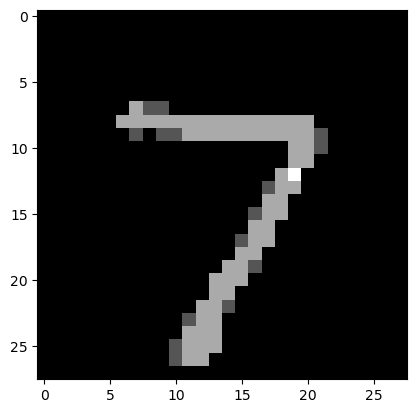

In [4]:
plt.imshow(images[0].reshape([28, 28]), cmap="gray")
plt.show()


## Manual inference on one image

First linear layer

In [5]:
im = images[0]
im.shape
out1 = np.dot(fc1.T, im).astype(int)
print(out1.shape)
out1

(128,)


array([ -3,  19,  11,   8,   8,   7,  -8,  22,   7,  15,  16,   4,  -3,
         5,  14,  -6,   4,  -6,   5, -18,  -9, -21,  -2,  17, -28,  -8,
        25, -10, -12,   4,  -2,  -6,  -2,  -6,   4,  -3,   2,  28,  -6,
        -5,   8,   0,  -5,  -6, -31,   0,  16,   4,  20,  13,  -3,   1,
        -6,  -9,  19,  16,  25, -21,   3,   1,   8,   5,   7,  12,  10,
        11,  -3, -10,  17,  -7,  -4,   3,  13,   5,  -8,   2,  -4,  -4,
        21,   6,  22,   9,   5,   4,   6,   3,  19,  -6,   1,  12, -12,
        11,   2,  -1,  -5,  14,  19,   5,   3,   8,  -1, -26,   1,  32,
         3, -22, -11,  16,  13, -14,  -4,  15,   7, -11,   7,  -2,  17,
         0, -16,  12, -23,  -9,   6,  -4, -13,  21, -21,  -3])

Square Activation

In [6]:
out2 = np.square(out1)
print(out2.shape)
out2

(128,)


array([   9,  361,  121,   64,   64,   49,   64,  484,   49,  225,  256,
         16,    9,   25,  196,   36,   16,   36,   25,  324,   81,  441,
          4,  289,  784,   64,  625,  100,  144,   16,    4,   36,    4,
         36,   16,    9,    4,  784,   36,   25,   64,    0,   25,   36,
        961,    0,  256,   16,  400,  169,    9,    1,   36,   81,  361,
        256,  625,  441,    9,    1,   64,   25,   49,  144,  100,  121,
          9,  100,  289,   49,   16,    9,  169,   25,   64,    4,   16,
         16,  441,   36,  484,   81,   25,   16,   36,    9,  361,   36,
          1,  144,  144,  121,    4,    1,   25,  196,  361,   25,    9,
         64,    1,  676,    1, 1024,    9,  484,  121,  256,  169,  196,
         16,  225,   49,  121,   49,    4,  289,    0,  256,  144,  529,
         81,   36,   16,  169,  441,  441,    9])

In [7]:
out3 = np.dot(fc2.T, out2)
print(out3.shape)
out3

(10,)


array([-5785., -5366., -4285., -1185., -4502.,  -956., -3270.,  6748.,
       -2990.,   501.])

In [8]:
np.argmax(out3)

7

In [9]:
labels[0]

7.0

## Manual inference on multiple images

In [10]:
num_ims = 10
i = 0
while i < num_ims:
    im = images[i]
    out1 = np.dot(fc1.T, im).astype(int)
    out2 = np.square(out1)
    out3 = np.dot(fc2.T, out2)
    print(np.argmax(out3) == labels[i])
    i += 1

True
True
True
True
True
True
True
True
True
True
